# **Regresyon Analizi**

Bağımlı değişken ile bağımsız değişken arasındaki ilişki irdelenir.Makine öğrenmesin de kullanılır, bağımsız değişken yada değişkenelere bakarak bağımlı değişken sonucu hakkında tahmin yapılmaya çalışıyor linear regresyonda.

In [ ]:
#Çalışmamızda kullanacağımız data seri paketini indirdik ve projemize ekeldik.
install.packages("datarium")
library(datarium)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data("marketing", package = "datarium")

In [ ]:
#verimizin hakkında bilgi edinmek için
head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [ ]:
#Sütun isimlerini düzenlemek için
colnames(marketing )= c( "youtube","facebook","gazete","satis")
marketing


youtube,facebook,gazete,satis
<dbl>,<dbl>,<dbl>,<dbl>
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20
216.96,12.96,70.08,15.48
10.44,58.68,90.00,8.64
69.00,39.36,28.20,14.16
144.24,23.52,13.92,15.84
10.32,2.52,1.20,5.76


In [ ]:
#Veri Setinin Özet Bilgileri için

str(marketing)

'data.frame':	200 obs. of  4 variables:
 $ youtube : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook: num  45.4 47.2 55.1 49.6 13 ...
 $ gazete  : num  83 54.1 83.2 70.2 70.1 ...
 $ satis   : num  26.5 12.5 11.2 22.2 15.5 ...


In [ ]:
#Paketin içinde eksik veri var mı kontolü için Amelia paketini indirip ekliyoruz
install.packages("Amelia")
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



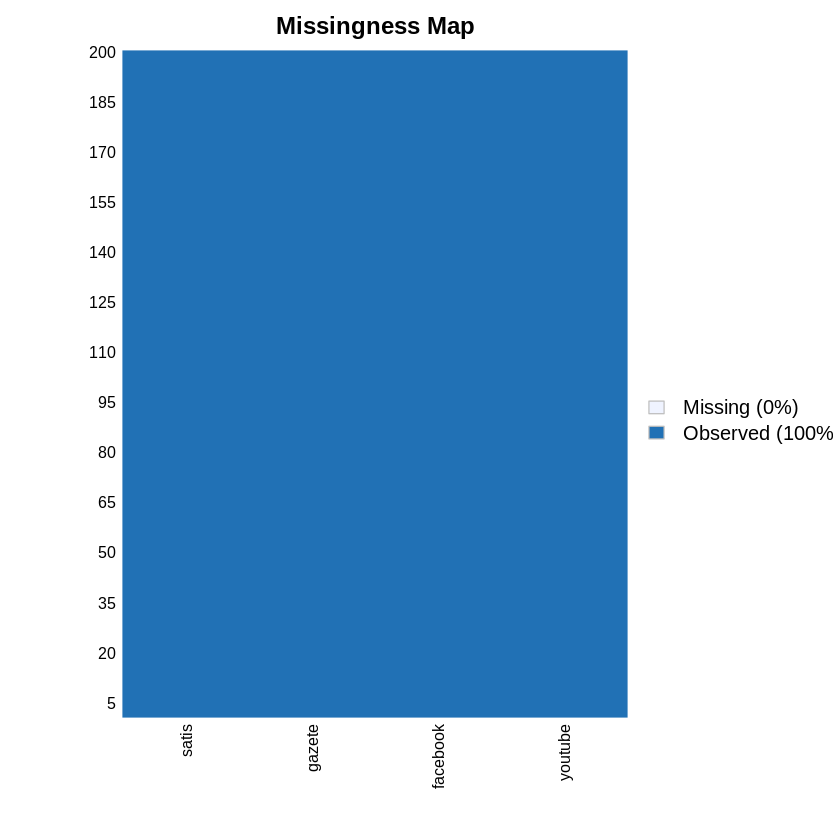

In [ ]:
#eksik veri kontrolü yapmak için
#beyaz çizgi olmadığı için eksik veri yok
missmap(marketing)

In [ ]:
#Değişkenler arasında ki korelasyona bakmak için paketimizi indirip ekliyoruz
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



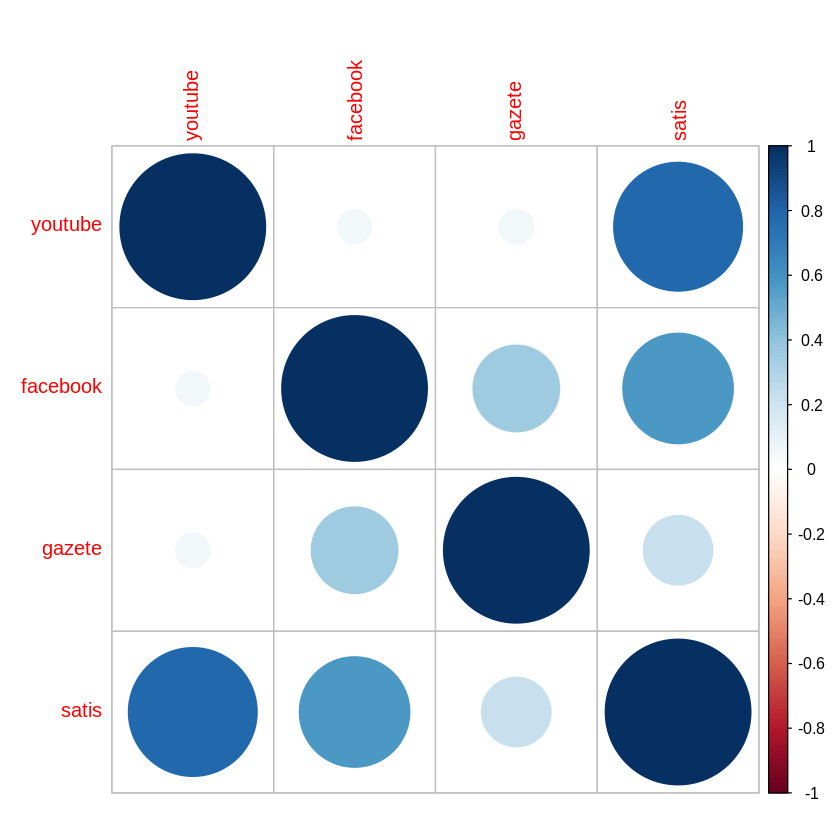

In [ ]:
korelasyon = cor(marketing)

corrplot(korelasyon,method = "circle")



Grafikten youtube harcamaları ve satış arasında pozitifi güçlü yönde bir ilişkinin olduğunu, ve facebook ile gazete harcamaları arasında pozitif bir ilişkinin olduğunu gözlemliyorum.

Makine öğrenmesin model kurulurken veri eğitim ve test şeklinde ikiye ayrılır.

Eğitim verisiyle model kurulur test verisiyle değerlendirilir.

In [ ]:
#Model Kurulmadan önce veri setini parçalayalım
install.packages("caret")

library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)

set.seed(100) # rastgele seçecek örneklemi sabitlemek için

egitimindis = createDataPartition(marketing$`satis`,p=0.8, list= F)#veri setini parçalamk için kullanılacak indisleri seçmek için

#oluşturulan indisle egitim verisini oluşturmak için

egitim_veri = marketing[egitimindis,]

#test verisini oluşturmak için

test_veri = marketing[-egitimindis,]

In [ ]:
#oluşturulan eğitim verisinin kontrolü için

nrow(egitim_veri)
nrow(test_veri)

#oran tutuyor

[1] 162

[1] 38

In [ ]:
#facebook reklam giderine dayanarak satışı tahmin eden bir model kullanalım
#linear fonksiyonun kat sayılaırnı belirlemek için lm() fonksiyonu kullanılır.
#~ tilda işareti altgr+ü ile oluşuyor


model= lm(satis~facebook, data = marketing)

#model oluştu özet bilgi almak için

summary(model)



Call:
lm(formula = satis ~ facebook, data = marketing)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8766  -2.5589   0.9248   3.3330   9.8173 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.17397    0.67548  16.542   <2e-16 ***
facebook     0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.13 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


p değerinin yanında bulunan *** yıldız p değerinin 0,001 den küçük olduğu ve p <0,5 anlamlılık oranından bile son derece küçük ve anlamlı olduğunu gösterir. yani modelimizin anlamlılık derecesi yoksektir.

In [ ]:
#Sadece katsayıları yazdırmak için, modelde ki katsayılara ait istatistikleri için

summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11.1739657,0.67548060,16.542245,3.561071e-39
facebook,0.2024958,0.02041131,9.920765,4.354966e-19


In [ ]:
#facebook un hem 0 hem de 1000$ harcaması için satışı tahmin edelim

tahmin = data.frame(facebook=c(0,1000))

predict(model,tahmin) #tahmini predict fonksiyonunu kullanarak yapacağız

1         2 
 11.17397 213.66975

Artık facebook e ne kadar reklam verirsek ne kadar satış yapacağımızı tahmin edebiliriz. 0 iken 11 , 1000$ iken 213 ürün satışı yapabiliriz.

In [ ]:
#Daha fazla değişkenle işlem yapmak yani çoklu linear regresyon için
#satış bizim bağımlı değişkenimiz

model2 = lm(satis~youtube+facebook+gazete, data=egitim_veri,list= F)

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘list’ will be disregarded”


In [ ]:
#tek tek model ismini yazmaktansa kısa yoldan bir . ile hepsini alabiliriz
model2 = lm(satis~., data=egitim_veri,list= F)

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘list’ will be disregarded”


In [ ]:
#kaysayıları ekrana yazdıralım

summary(model2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.572390683,0.391247355,9.1307727,3.087050e-16
youtube,0.045655044,0.001445340,31.5877641,3.630643e-70
facebook,0.192078090,0.009426115,20.3772281,4.536887e-46
gazete,-0.004134458,0.006539398,-0.6322383,5.281450e-01


katsayıların istatistikleri yukarıdadır.

In [ ]:
summary(model2)


Call:
lm(formula = satis ~ ., data = egitim_veri, list = F)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3081 -1.1911  0.2353  1.5093  3.4387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.572391   0.391247   9.131 3.09e-16 ***
youtube      0.045655   0.001445  31.588  < 2e-16 ***
facebook     0.192078   0.009426  20.377  < 2e-16 ***
gazete      -0.004134   0.006539  -0.632    0.528    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.926 on 158 degrees of freedom
Multiple R-squared:  0.9096,	Adjusted R-squared:  0.9079 
F-statistic: 529.7 on 3 and 158 DF,  p-value: < 2.2e-16


Modelin anlamlılığı için ilk bakılacak değer f ve p değerleridir

F-statistic: 529.7 on 3 and 158 DF,  p-value: < 2.2e-16

Burda p değeri çok küçük olduğu için anlamlılığın yüksek olduğunu söyleyebiliriz. Modelin anlamlı olması en azından birr bağımsız değişkenin sonuç değişkeni ile ilişkili olduğu anlamına gelir.

gazete değişkeninin değerinin 0,05 ten büyük olduğunu gözlemliyoruz. bu gazete değişkeni ile satış arasında anlamlı bir ilişkinin olmadığı gözlemlenmiştir.

bağımsız değşkendeki 1 birimlik artışın etkisini araştırıyoruz özetle

youtube a verilen 1000$ yatırım yaklaşık 45 satışa

facebook a verilen 1000$ yatırım yaklaşık 192 satışa

gazete ye verilen 1000$ yatırım yaklaşık 4 satışa katkı sağlamaktadır diyebiliriz estimate oranına bakarak



In [ ]:
#gazete değişkenini hesaba katmadan bir model kurmak istediğimizde daha anlamlı bir model kurabiliriz.
model3 = lm(satis~youtube+facebook, data=egitim_veri,list= F)

summary(model3)

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘list’ will be disregarded”



Call:
lm(formula = satis ~ youtube + facebook, data = egitim_veri, 
    list = F)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4546 -1.1647  0.2732  1.4684  3.4191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.496965   0.371911   9.403   <2e-16 ***
youtube     0.045615   0.001441  31.650   <2e-16 ***
facebook    0.189526   0.008502  22.293   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.922 on 159 degrees of freedom
Multiple R-squared:  0.9093,	Adjusted R-squared:  0.9082 
F-statistic: 797.4 on 2 and 159 DF,  p-value: < 2.2e-16


In [ ]:
#uyum iyiliği modelin veriye daha ne kadar uyduğunu daha fazla araştırmak için kullanılır.

#Kurduğumuz modelin veriye ne kadar uyguğunu gösterir

#Residual standard error: 1.922 on 159 degrees of freedom
#Multiple R-squared:  0.9093,	Adjusted R-squared:  0.9082
#F-statistic: 797.4 on 2 and 159 DF,  p-value: < 2.2e-16

#değerlerine bakılır.Artık standart hata modelin tahmin hatasını gösterir.gözlemle tahmin arasındaki farkı ifade eder.
#düşük artık hatalar modelin veriye iyi uyduğunu gösterir. 1.922 sapma var.
#1.922/mean(marketing$satis) hesaplaması sonucu 0.11 yani %11 hatamız var

#r squred açıklayıcılık katsayısı diyebiliriz.0-1 arası değer alır.1 e yakın olması o kadar iyidir. 0.90 değerimiz iyi bir değerdir

#f istatistiği kurduğumuz modelin anlamlılığını gösterir.p değerinin küçük olması en az bir bağımsız değişkenin bağımlı değişkenle ilişkili
#olduğunu gösterir.


In [ ]:
#model yeni bir veriyi nasıl tahmin edecek ,modelin performansını değerlendirmek için

tahmin= predict(model2,test_veri)

#Kurduğumuz modele göre test verisindeki örneklem verilerini tahmn ettik.

#bunun altı tanesini görüntülemek için

head(tahmin)

5         8         9        13        15        19 
15.677298 14.617799  4.522626 12.639675 22.109245 11.997914

In [ ]:
#modelin test verisindeki tahmin hatasını bulalım

RMSE(tahmin,test_veri$satis)

[1] 2.391512

In [ ]:
#Modelin hata oranı yaklaşık %14 çıktı
2.39/mean(test_veri$satis)

[1] 0.1469579

In [ ]:
#r square değerini hesaplamka için %83 çıktı bu da gözlem değerleriyle tahmin değerleri arasında yüksek bir ilişkinin olduğunu söyler.y
#yani %83 ihtimalle doğru tahmin edebiliriz.

R2(tahmin, test_veri$satis)

[1] 0.8338814